### Importando bibliotecas

In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from compexp import compexp

### Função de plot

In [2]:
def plot_compexp(n, x, y, rms, f, G, g, filename):
    fig, ax = plt.subplots(nrows=3, ncols=2, sharey='row', figsize=(15, 15))

    plt.subplot(321)
    plt.plot(n, x)
    plt.title(r'Input signal $x[n]$')
    plt.ylabel(r'$x[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(322)
    plt.plot(n, y)
    plt.title(r'Output signal $y[n]$')
    plt.ylabel(r'$y[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(323)
    plt.plot(n, rms)
    plt.title(r'Final $X_{rms}[n]$')
    plt.ylabel(r'$X_rms[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(324)
    plt.plot(n, G)
    plt.title(r'Final $G[n]$')
    plt.ylabel(r'$G[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(325)
    plt.plot(n, f)
    plt.title(r'Final $f[n]$')
    plt.ylabel(r'$f[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.subplot(326)
    plt.plot(n, g)
    plt.title(r'Final $g[n]$')
    plt.ylabel(r'$g[n]$')
    plt.xlabel(r'$n$')
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(f"figures/{filename}.jpg", dpi=600, bbox_inches='tight')
    plt.show()

### Sinal de entrada $x[n]$

In [3]:
N = 1200
n = np.arange(N)
fs = 100
ts = 1/fs

In [4]:
t1 = np.arange(0, int(N/3))/fs
t2 = np.arange(int(N/3), int(2*N/3))/fs
t3 = np.arange(int(2*N/3), N)/fs

x1 = 0.3* np.sin(np.multiply(2 * np.pi, t1))
x2 = 2 * np.sin(np.multiply(2 * np.pi, t2))
x3 = 4 * np.sin(np.multiply(2 * np.pi, t3))
x_raw = [x1, x2, x3]
x_book = np.concatenate(x_raw)

### Compressor

In [5]:
CT = 0.5
ET = 0.1
CS = 0.3
ES = 0

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y_book, rms, G, f, g = compexp(x_book, CT, CS, ET, ES, tav, at, rt, delay)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)
/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:45: RuntimeWarning: invalid value encountered in double_scalars
  G = min([0, CS * (CT-X), ES * (ET-X)])


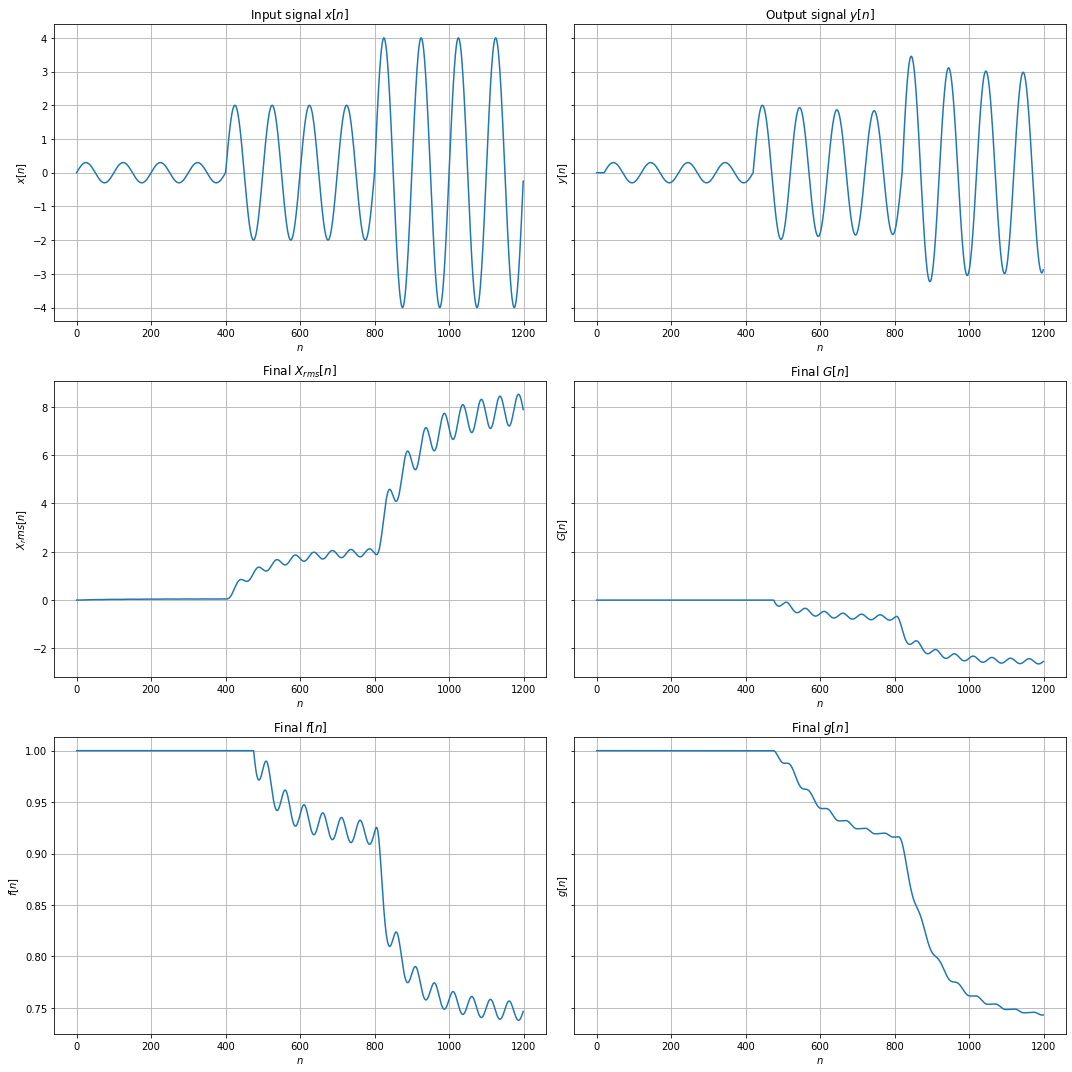

In [6]:
plot_compexp(n, x_book, y_book, rms, f, G, g, 'compressor/book_example')

### Expander

In [7]:
CT = 4
ET = 0.05
CS = 0
ES = -3

tav = 0.01
at = 0.03
rt = 0.01
delay = 20

y_book, rms, G, f, g = compexp(x_book, CT, CS, ET, ES, tav, at, rt, delay)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)
/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:45: RuntimeWarning: invalid value encountered in double_scalars
  G = min([0, CS * (CT-X), ES * (ET-X)])


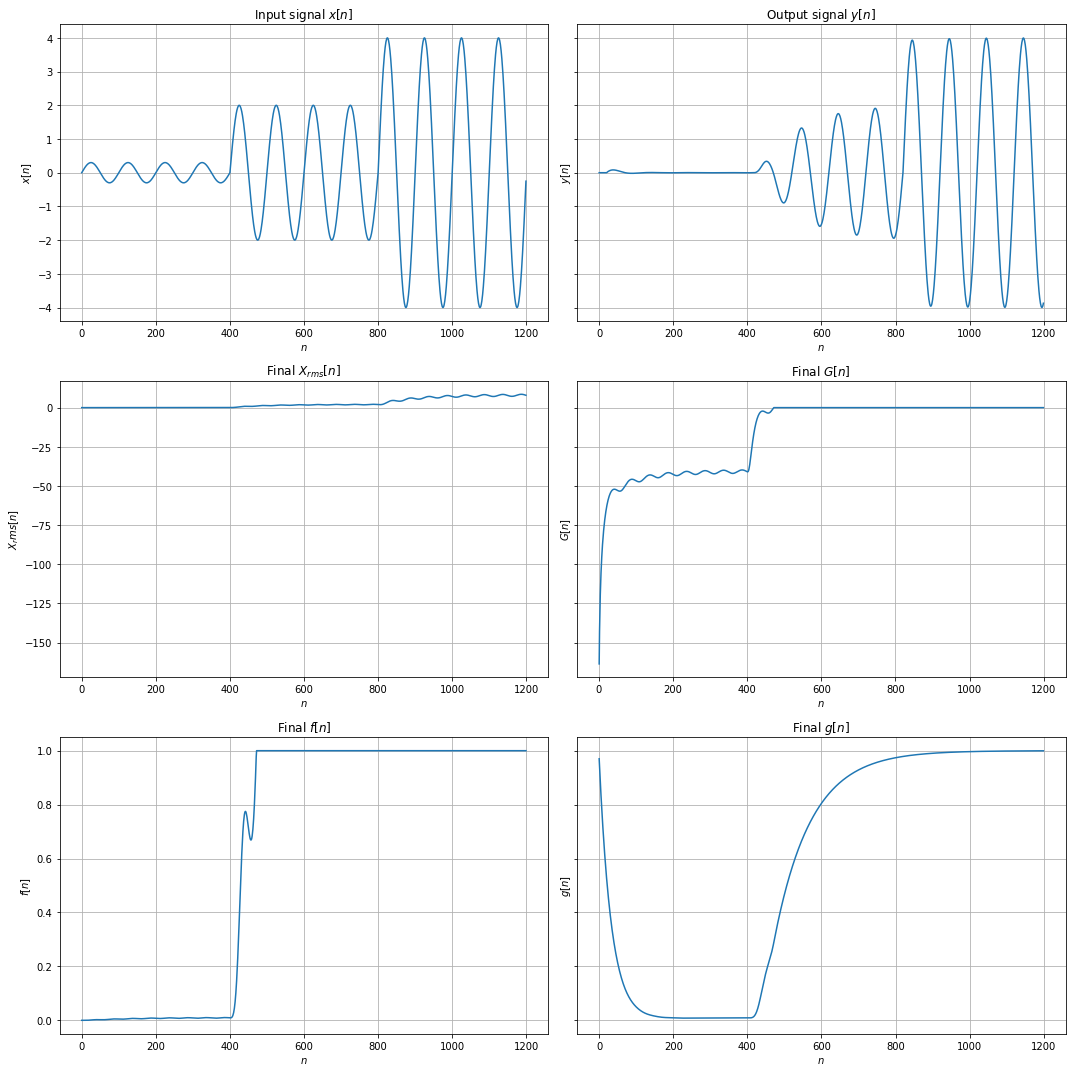

In [8]:
plot_compexp(n, x_book, y_book, rms, f, G, g, 'expander/book_example')

### Linear

In [9]:
N = 100
n = np.arange(N)
x_linear = 2. * n
sf.write('audios/linear.wav', x_linear, 44100)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)
/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:45: RuntimeWarning: invalid value encountered in double_scalars
  G = min([0, CS * (CT-X), ES * (ET-X)])


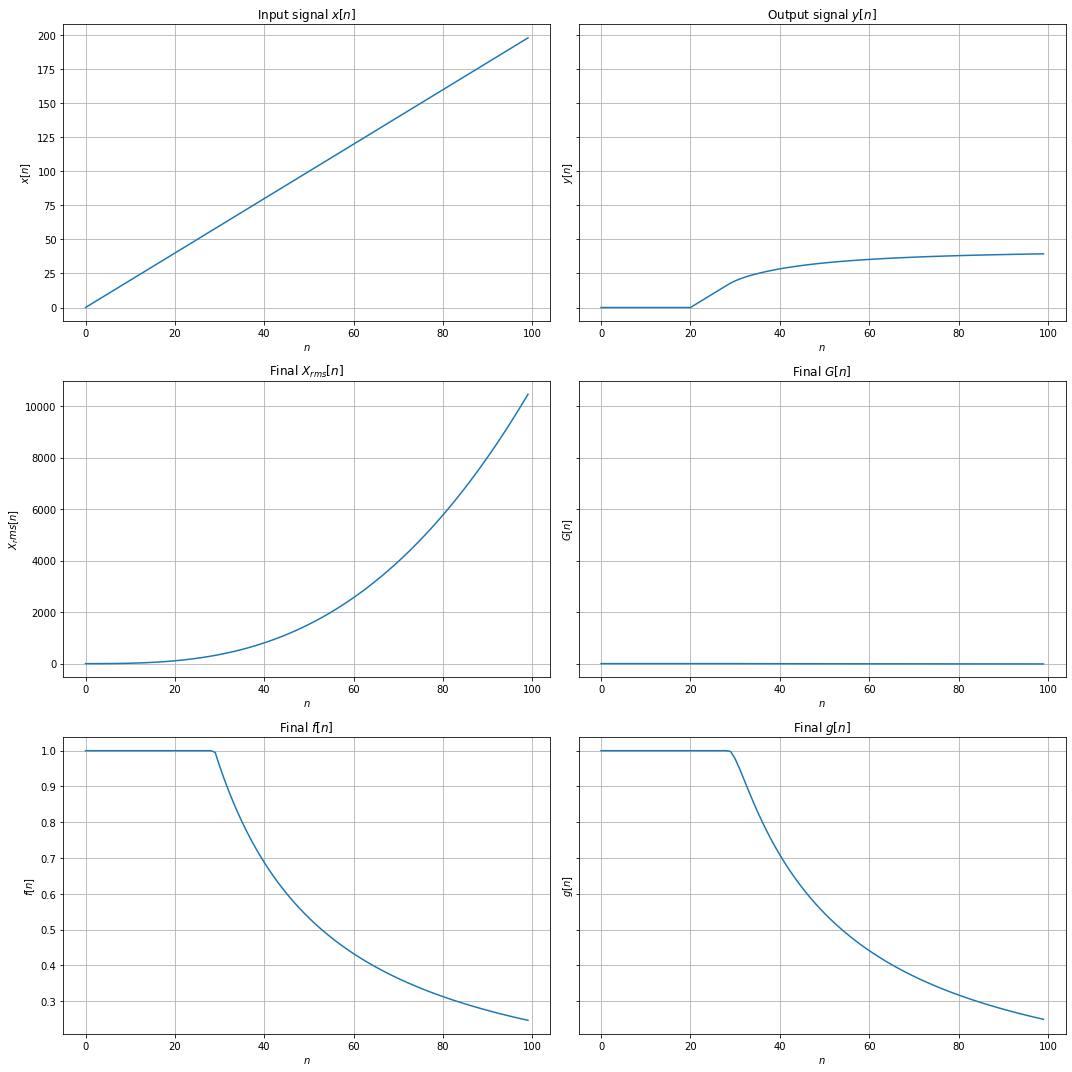

In [10]:
CT = 25
ET = 0.1
CS = 0.8
ES = 0

tav = 0.01
at = 0.5
rt = 0.01
delay = 20

y_linear, rms, G, f, g = compexp(x_linear, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_linear, y_linear, rms, f, G, g, 'compressor/linear')
sf.write('audios/compressor/linear_out.wav', y_linear, 44100)

/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:44: RuntimeWarning: divide by zero encountered in log10
  X = 10 * np.log10(xrms)
/home/gbfelgas/projects/coe780-topics-in-audio-signal-processing/chap04/../src/compexp.py:45: RuntimeWarning: invalid value encountered in double_scalars
  G = min([0, CS * (CT-X), ES * (ET-X)])


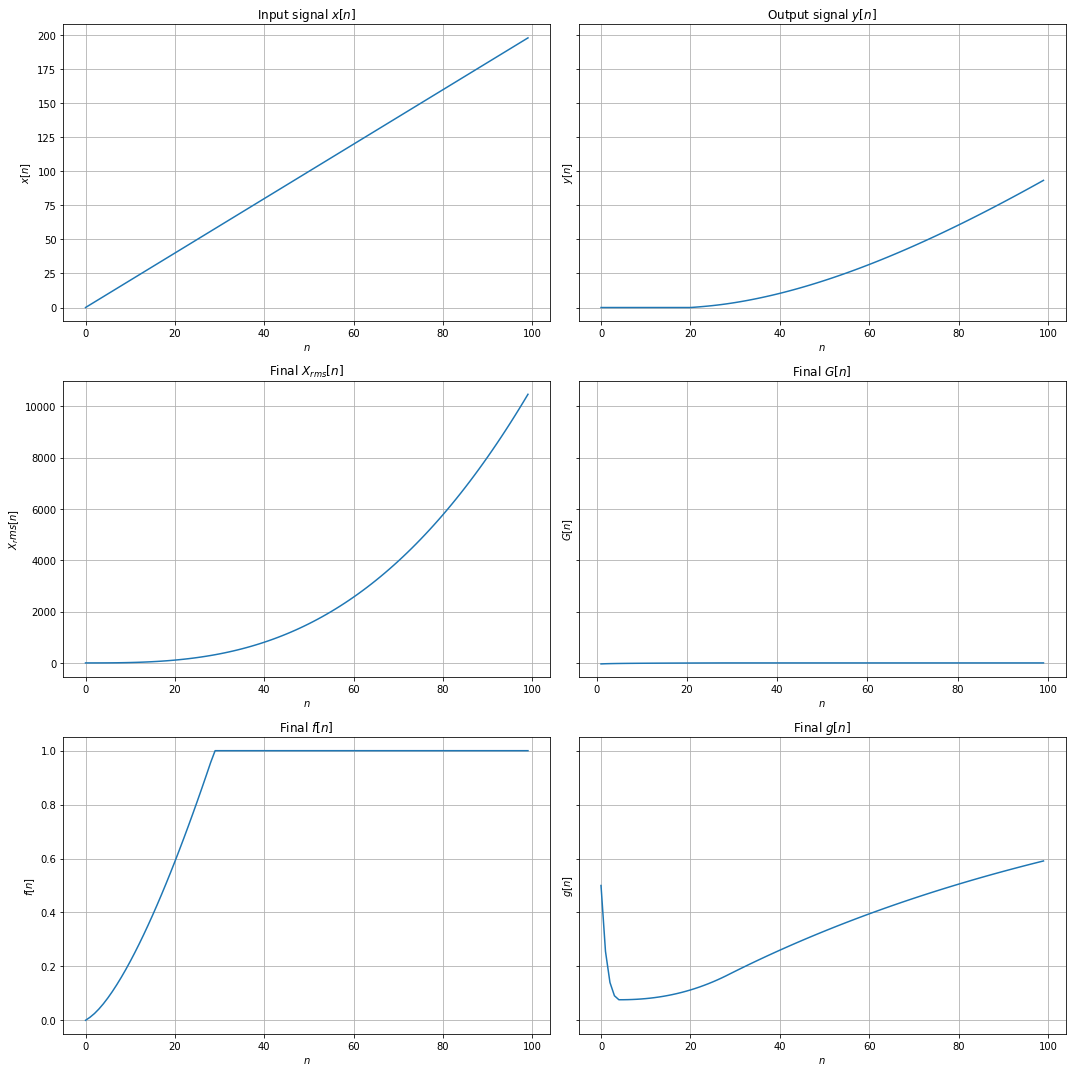

In [11]:
CT = 200
ET = 25
CS = 0
ES = -1

tav = 0.01
at = 0.5
rt = 0.01
delay = 20

y_linear, rms, G, f, g = compexp(x_linear, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_linear, y_linear, rms, f, G, g, 'expander/linear')
sf.write('audios/expander/linear_out.wav', y_linear, 44100)

### Vocalize

In [12]:
x_vocalize, sr = sf.read('audios/vocalize.wav')
x_vocalize = np.mean(x_vocalize, axis=-1)
n = np.arange(len(x_vocalize))
print(x_vocalize.shape)

(476281,)


In [ ]:
CT = 0.1
ET = 0
CS = -0.8
ES = 0

tav = 0.01
at = 0.03
rt = 0.01
delay = 150

y_vocalize, rms, G, f, g = compexp(x_vocalize, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_vocalize, y_vocalize, rms, f, G, g, 'compressor/vocalize')
sf.write('audios/compressor/vocalize_out.wav', y_vocalize, sr)

In [ ]:
plt.plot(n, rms)
plt.title(r'Final $X_{rms}[n]$')
plt.ylabel(r'$X_rms[n]$')
plt.xlabel(r'$n$')
plt.grid(True)

In [ ]:
CT = 0
ET = 0.2
CS = 0
ES = -3

tav = 0.001
at = 0.001
rt = 0.8
delay = 150

y_vocalize, rms, G, f, g = compexp(x_vocalize, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_vocalize, y_vocalize, rms, f, G, g, 'expander/vocalize')
sf.write('audios/expander/vocalize_out.wav', y_vocalize, sr)

In [ ]:
plt.plot(n, rms)
plt.title(r'Final $X_{rms}[n]$')
plt.ylabel(r'$X_rms[n]$')
plt.xlabel(r'$n$')
plt.grid(True)

### Guitarra

In [ ]:
x_guitar, sr = sf.read('audios/gtr-jazz-3.wav')
x_guitar = np.mean(x_guitar, axis=-1)
n = np.arange(len(x_guitar))
print(x_guitar.shape)

In [ ]:
CT = 0.3
ET = 0
CS = -0.3
ES = 0

tav = 0.01
at = 0.03
rt = 0.003
delay = 20

y_guitar, rms, G, f, g = compexp(x_guitar, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_guitar, y_guitar, rms, f, G, g, 'compressor/gtr-jazz-3')
sf.write('audios/compressor/gtr-jazz-3_out.wav', y_guitar, sr)

In [ ]:
plt.plot(n, rms)
plt.title(r'Final $X_{rms}[n]$')
plt.ylabel(r'$X_rms[n]$')
plt.xlabel(r'$n$')
plt.grid(True)

In [ ]:
CT = 1
ET = 0.3
CS = 0.1
ES = -0.8

tav = 0.01
at = 0.001
rt = 0.003
delay = 20

y_guitar, rms, G, f, g = compexp(x_guitar, CT, CS, ET, ES, tav, at, rt, delay)
plot_compexp(n, x_guitar, y_guitar, rms, f, G, g, 'expander/gtr-jazz-3')
sf.write('audios/expander/gtr-jazz-3_out.wav', y_guitar, sr)

In [ ]:
plt.plot(n, rms)
plt.title(r'Final $X_{rms}[n]$')
plt.ylabel(r'$X_rms[n]$')
plt.xlabel(r'$n$')
plt.grid(True)

### Shine On You Crazy Diamond

In [ ]:
x_shine, sr = sf.read('audios/shine_on.wav')
x_shine = np.mean(x_shine, axis=-1)
n = np.arange(len(x_shine))
print(x_shine.shape)

In [ ]:
sf.write('audios/shine_on_part.wav', x_shine[10000:20000], sr)

In [ ]:
# CT = 0.5
# ET = 0.1
# CS = 0.3
# ES = 0.1

# tav = 0.01
# at = 0.03
# rt = 0.003
# delay = 20

# y_shine, rms, G, f, g = compexp(x_shine, CT, CS, ET, ES, tav, at, rt, delay)
# plot_compexp(n, x_shine, y_shine, rms, f, G, g, 'compressor/shine_on')
# sf.write('audios/compressor/shine_on_out.wav', y_shine, sr)

In [ ]:
# CT = 1
# ET = 0.05
# CS = 0.1
# ES = -3

# tav = 0.01
# at = 0.03
# rt = 0.01
# delay = 20

# y_shine, rms, G, f, g = compexp(x_shine, CT, CS, ET, ES, tav, at, rt, delay)
# plot_compexp(n, x_shine, y_shine, rms, f, G, g, 'expander/shine_on')
# sf.write('audios/expander/shine_on_out.wav', y_shine, sr)